[11.50769231 25.57823312 34.67383272 45.07598253 47.83983876]
-----------------------------
[46234.9991643  59142.26976433 63958.41551061 68389.26959719
 69352.49874645]
-----------------------------
[541.33478188 520.1437406  520.1437406  529.77603209 534.59217784]
-----------------------------
[0.86898396 0.4691489  0.40376269 0.35495621 0.39715853]


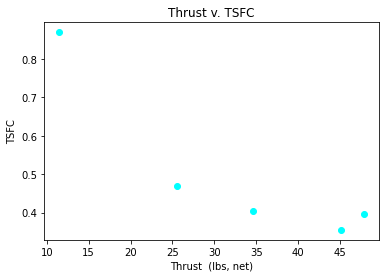

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

local_OAT = 299.15
 
local_bar = 29.77

gamma = local_bar/29.92

theta = local_OAT / 288.15

#You can also use gen from text to extract each row from a csv
Thrust = np.array([11.45,25.45,34.50,44.85,47.60])
RPM = np.array([24000,30700,33200,35500,36000])
EGT = np.array([562,540,540,550,555])
Mf = np.array([10,12,14,16,19])

RPM = RPM/(theta**1/2)
EGT = EGT/theta
Thrust = Thrust/gamma

TSFC = Mf/Thrust


pdf = PdfPages('EngineRun.pdf')

plt.scatter(x=RPM, y=Thrust, c='olive')
plt.title("RPM v. Thrust")
plt.xlabel("RPM  cycles/min")
plt.ylabel("Thrust  (lbs, net)")
plt.savefig(pdf, format="pdf")
#pdf.close()
#plt.show()

plt.clf()

plt.scatter(x=Thrust, y=EGT, c='blue')
plt.title("Thrust v. EGT")
plt.xlabel("Thrust  (lbs, net)")
plt.ylabel("EGT  (C)")
plt.savefig(pdf, format="pdf")
#pdf.close()
#plt.show()

plt.clf()

plt.scatter(x=RPM, y=EGT, c="purple")
plt.title("RPM v. EGT")
plt.xlabel("RPM  (cycles/min)")
plt.ylabel('EGT  (C)')
plt.savefig(pdf, format='pdf')
#plt.show()

plt.clf()

plt.scatter(x=Thrust, y=TSFC, c="cyan")
plt.title("Thrust v. TSFC")
plt.xlabel("Thrust  (lbs, net)")
plt.ylabel("TSFC")
plt.savefig(pdf, format='pdf')
pdf.close()







print(Thrust)
print("-----------------------------")
print(RPM)
print("-----------------------------")
print(EGT)
print("-----------------------------")
print(TSFC)




In [7]:
#Do this one with Pandas and overlap the graphs into one (maybe)

# df=pd.read_csv("Trim_data.csv")
df1=pd.read_csv('Other_trim.csv')
df2=df1.set_index("Target_Thrust", drop = True)

local_OAT = 299.15
 
local_bar = 29.77

gamma = local_bar/29.92

theta = local_OAT / 288.15

def RPMlister (RPM):
    elist = []
    for i in RPM:
        elist.append(i)
    return elist

RPMlist = RPMlister(RPM)

def EGTlister (EGT):
    elist = []
    for i in EGT:
        elist.append(i)
    return elist

EGTlist = EGTlister(EGT)

def Thrustlister (Thrust):
    elist = []
    for i in Thrust:
        elist.append(i)
    return elist

Thrustlist = Thrustlister(Thrust)

def corrected_RPM (theta, RPM):
    corrected_RPM = []
    for i in RPM:
        correction = theta**1/2
        corrected_RPM.append(i/correction)
    return corrected_RPM
   
print(Thrust)
print('-----------------')
print(Thrustlist)
print('-----------------')
print(RPM)
print('-----------------')
print(RPMlist)
print('-----------------')
print(EGT)
print('-----------------')
print(EGTlist)
print('-----------------')
print(df2)
print('-----------------')
# print(df.head)

[11.50769231 25.57823312 34.67383272 45.07598253 47.83983876]
-----------------
[11.507692307692308, 25.5782331205912, 34.673832717500844, 45.0759825327511, 47.839838763856235]
-----------------
[46234.9991643  59142.26976433 63958.41551061 68389.26959719
 69352.49874645]
-----------------
[46234.999164298846, 59142.26976433227, 63958.4155106134, 68389.26959719205, 69352.49874644827]
-----------------
[541.33478188 520.1437406  520.1437406  529.77603209 534.59217784]
-----------------
[541.334781881999, 520.143740598362, 520.143740598362, 529.7760320909242, 534.5921778372054]
-----------------
               Thrust    RPM  EGT
Target_Thrust                    
IDLE            11.45  24000  562
25lbs           25.45  30700  540
35lbs           34.50  33200  450
45lbs           44.85  35500  550
FULL            47.60  36000  555
-----------------
